Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. In this project given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, and I am identifying the sentiment towards such companies or products in tweets. Here sentiments are bipolar i.e Positive, labelled as 0 and Negative labelled as 1

## Loading Libraries and Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Import packages
import os
os.chdir(r'/Users/harsh/Desktop/NLP Project')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re # for regular expressions 
import nltk # for text manipulation 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [2]:
#Reading Data file
its=pd.read_csv('Identify the sentiments.csv')

#Make copy of the dataset
itsc=its.copy()

## Preprocessing
### Data Inspection

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


Shape of Dataframe: (7920, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id                7920 non-null int64
sentiment_type    7920 non-null int64
tweet             7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.7+ KB


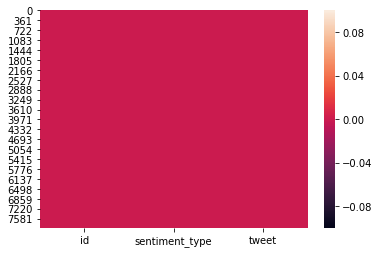

In [3]:
# checking the content of dataset
its.head(10)

#Renaming columns
its.columns=['id','sentiment_type','tweet']

#Exploring dataset Dimensions and info
print("Shape of Dataframe:",its.shape)

its.info()

#Exploring presence of null values
sns.heatmap(its.isnull()) # so, there is no null values

number of positve tagged sentences is:  5894
number of negative tagged sentences is: 2026
total length of the data is:            7920


0    0.744192
1    0.255808
Name: sentiment_type, dtype: float64

(array([1.000e+00, 3.000e+00, 2.260e+02, 6.280e+02, 9.710e+02, 2.296e+03,
        2.702e+03, 2.400e+02, 9.900e+01, 6.100e+01, 7.900e+01, 8.800e+01,
        1.190e+02, 1.770e+02, 1.730e+02, 2.900e+01, 1.100e+01, 8.000e+00,
        5.000e+00, 4.000e+00]),
 array([  7.  ,  26.55,  46.1 ,  65.65,  85.2 , 104.75, 124.3 , 143.85,
        163.4 , 182.95, 202.5 , 222.05, 241.6 , 261.15, 280.7 , 300.25,
        319.8 , 339.35, 358.9 , 378.45, 398.  ]),
 <a list of 20 Patch objects>)

Text(0.5,1,'Tweet Length')

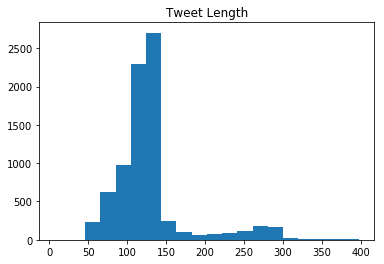

In [4]:
## Distribution of label types
# check the number of positive vs. negative tagged sentences
positives = its['sentiment_type'][its.sentiment_type == 0]
negatives = its['sentiment_type'][its.sentiment_type == 1]
print('number of positve tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('total length of the data is:            {}'.format(its.shape[0]))
its.sentiment_type.value_counts(normalize='True') #as positive are 75% and negative are 25% its imbalance classification problem

#Checking Distribution of length of the tweets or number of characters.
tweet_length=its.tweet.str.len()
plt.hist(tweet_length, bins=20)
plt.title("Tweet Length")
plt.show()

### Data Cleaning

In [5]:
#First lets see if dataset have any duplicates, which we will drop if found.
itsd=its.drop_duplicates()
print("After dropping duplicates dimension is:", itsd.shape) 
# same dimension shows that this data set do not have any duplicates.

After dropping duplicates dimension is: (7920, 3)


In [6]:
# Transforming tweets into Lower case
its['tidy_tweet']=its['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
its.head(20)

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,i'm wired i know i'm george i was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service! apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...,iphone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...,new type c charger cable #uk http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...,bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,photo: #fun #selfie #pool #water #sony #camera...


In [7]:
#Removing urls and web addresses
its.tidy_tweet=its.tidy_tweet.apply(lambda x: re.sub('http\S+','',x))
its.head()

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test #android #apps #...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,i'm wired i know i'm george i was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service! apple won't even talk to...


In [8]:
# removing twitter handles (i.e. @user_name)
its['tidy_tweet'] = its.tidy_tweet.apply(lambda x: re.sub("@[\w]*",'',x))
its.head()

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test #android #apps #...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,i'm wired i know i'm george i was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service! apple won't even talk to...


In [9]:
# %load appos.py
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "i would",
"i'd" : "i had",
"i'll" : "i will",
"i'm" : "i am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "i have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}


In [10]:
# Apostrophes Handling
its['tidy_tweet']=its['tidy_tweet'].apply(lambda x: " ".join(appos[x] if x in appos else x for x in x.split()))
its.head()

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test #android #apps #b...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i was made that ...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service! apple will not even talk...


In [11]:
# removing special characters, numbers, punctuations, # tag
its['tidy_tweet']=its.tidy_tweet.apply(lambda x: re.sub("[^a-z\s]",'',x))
its.head()

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to ...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i was made that ...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...


In [12]:
# Removal of stop words
stop = stopwords.words('english')
its.tidy_tweet = its.tidy_tweet.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
its.head()

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple even talk question unles...


In [13]:
# Removing words having word length of 2 or less.
its['tidy_tweet'] = its['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
its.head()

,id,sentiment_type,tweet,tidy_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love would talk makememories unplug relax ipho...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple even talk question unles...


In [14]:
# Tokenization of tidy tweets
its['tokenize_tweet']=its['tidy_tweet'].apply(lambda x: word_tokenize(x))
its.head()

,id,sentiment_type,tweet,tidy_tweet,tokenize_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,"[fingerprint, pregnancy, test, android, apps, ..."
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...,"[finally, transparant, silicon, case, thanks, ..."
2,3,0,We love this! Would you go? #talk #makememorie...,love would talk makememories unplug relax ipho...,"[love, would, talk, makememories, unplug, rela..."
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...,"[wired, know, george, made, way, iphone, cute,..."
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple even talk question unles...,"[amazing, service, apple, even, talk, question..."


In [15]:
# Lemmatization of tidy tweet tokens
its['tokenize_tweet']=its['tokenize_tweet'].apply(lambda x:[WordNetLemmatizer().lemmatize(i,'v') for i in x])
its.head(20)

,id,sentiment_type,tweet,tidy_tweet,tokenize_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,"[fingerprint, pregnancy, test, android, apps, ..."
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...,"[finally, transparant, silicon, case, thank, u..."
2,3,0,We love this! Would you go? #talk #makememorie...,love would talk makememories unplug relax ipho...,"[love, would, talk, makememories, unplug, rela..."
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...,"[wire, know, george, make, way, iphone, cute, ..."
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple even talk question unles...,"[amaze, service, apple, even, talk, question, ..."
5,6,1,iPhone software update fucked up my phone big ...,iphone software update fucked phone big time s...,"[iphone, software, update, fuck, phone, big, t..."
6,7,0,Happy for us .. #instapic #instadaily #us #son...,happy instapic instadaily sony xperia xperiaz,"[happy, instapic, instadaily, sony, xperia, xp..."
7,8,0,New Type C charger cable #UK http://www.ebay.c...,new type charger cable bay amazon etsy new yea...,"[new, type, charger, cable, bay, amazon, etsy,..."
8,9,0,Bout to go shopping again listening to music #...,bout shopping listening music iphone justme mu...,"[bout, shop, listen, music, iphone, justme, mu..."
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,photo fun selfie pool water sony camera picoft...,"[photo, fun, selfie, pool, water, sony, camera..."


In [16]:
# Stitching of tokens back together
for i in range(len(its['tokenize_tweet'])):
    its['tokenize_tweet'][i] = ' '.join(its['tokenize_tweet'][i])
its.head()

,id,sentiment_type,tweet,tidy_tweet,tokenize_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...,finally transparant silicon case thank uncle y...
2,3,0,We love this! Would you go? #talk #makememorie...,love would talk makememories unplug relax ipho...,love would talk makememories unplug relax ipho...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...,wire know george make way iphone cute daventry...
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple even talk question unles...,amaze service apple even talk question unless ...


## Story generation and visualization from tweets.

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

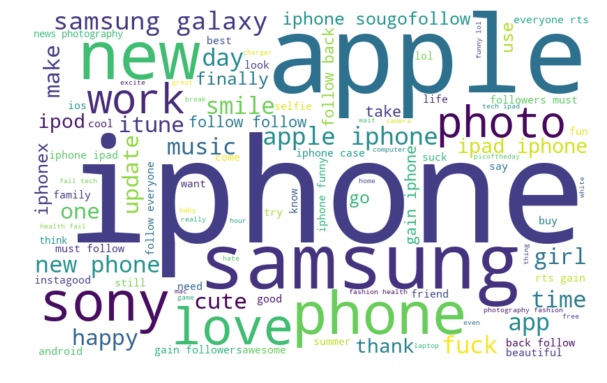

In [17]:
## Most common words in all tweets.
words = ' '.join([t for t in its.tokenize_tweet])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_words=100, background_color="white").generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most common word is iphone followed by apple and samsung, shows among all the tech firms tweets are more incline towards iphone and apple foolwed by samsung and sony.

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

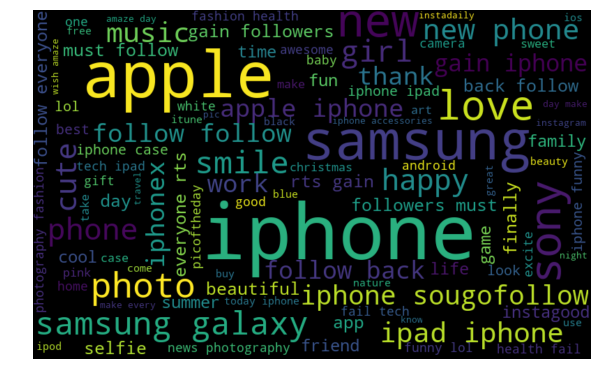

In [18]:
# most common words in positive tweets
positive_words =' '.join([t for t in its['tokenize_tweet'][its['sentiment_type'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_words=100,max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

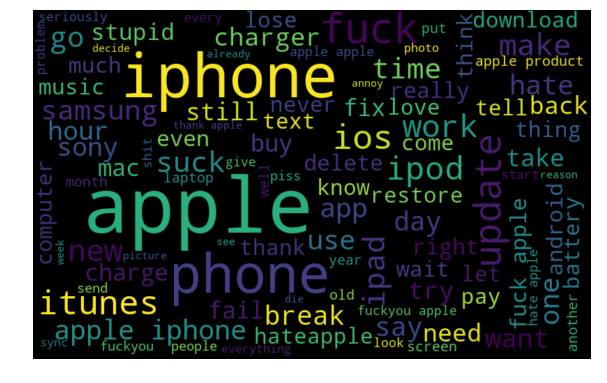

In [19]:
# most common words in negative tweets
negative_words =' '.join([t for t in its['tokenize_tweet'][its['sentiment_type'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_words=100,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Feature Extraction from cleaned Tweets


Before feature extraction lets split the data into train and test and then we will do the feature extraction and then we will train the data on model

In [20]:
from sklearn.model_selection import train_test_split

# Split into training and test (hold-out) set
# 80% of the input for training and 20% for training
X=its['tokenize_tweet']
y=its['sentiment_type']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2,random_state=42,shuffle= True,stratify=y)
print (Xtrain.shape, ytrain.shape)
print (Xtest.shape, ytest.shape)


(6336,) (6336,)
(1584,) (1584,)


### One-hot encoding Feature

In [21]:
# Vectorization (one-hot encoding)
cvohe = CountVectorizer(binary=True)
cvohe.fit(Xtrain)
Xohe_train = cvohe.transform(Xtrain)
Xohe_test = cvohe.transform(Xtest)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Bag of words feature

In [22]:
# Vectorization (one-hot encoding)
cvbow = CountVectorizer()
cvbow.fit(Xtrain)
Xbow_train = cvbow.transform(Xtrain)
Xbow_test = cvbow.transform(Xtest)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Tf-Idf feature

In [23]:
# Vectorization (with TF-IDF features)
tf_idf = TfidfVectorizer()
tf_idf.fit(Xtrain)
Xtf_idf_train = tf_idf.transform(Xtrain)
Xtf_idf_test= tf_idf.transform(Xtest)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## Model building
We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF. First, we try a basic Logistic Regression:

- Split the data into a training and test (hold-out) set
- Train on the training set, and test for accuracy on the testing set

#### a)One-hot encoding
#### b) Bag of word feature
#### c) Tf-Idf feature

### a) One-hot encoding feature
### Logistic Regression
Modelling without tuning

In [24]:
from sklearn.linear_model import LogisticRegression
#Instantiate a logistic classifier
lr = LogisticRegression(random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
lr.fit(Xohe_train, ytrain)

# Predict the labels of the validation data: y_predict
y_predict_ohe=lr.predict(Xohe_test)

# Model evaluation
## Compute and print the confusion matrix and classification report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict_ohe))
print('The precision of model is: \n',precision_score(ytest,y_predict_ohe,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict_ohe,pos_label=0))
f1score=f1_score(ytest,y_predict_ohe,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict_ohe))
print('The classification report of the model is: \n',classification_report(ytest,y_predict_ohe))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The accuracy of model is: 
 0.8914141414141414
The precision of model is: 
 0.9412795793163892
The recall or sensitivity of model is: 
 0.910941475826972
The f1 score of model is 0.93
The confusion matrix of model is: 
 [[1074  105]
 [  67  338]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.94      0.91      0.93      1179
          1       0.76      0.83      0.80       405

avg / total       0.90      0.89      0.89      1584



Modelling with tuning
- cross validation for validating the stability of our machine learning model

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# Build the k-fold cross-validator(5-fold cross-validation) and defining metrices
stratkfold = StratifiedKFold(n_splits=5, random_state=42)
scoring = ['accuracy', 'precision','recall','f1']
#calculating score for the model after CV
result = cross_validate(lr, Xohe_train, ytrain, cv=stratkfold, scoring=scoring,return_train_score=False)
print('The accuracy after CV is: \n',result['test_accuracy'].mean())
print('The precision after CV is: \n',result['test_precision'].mean())
print('The recall after CV is: \n',result['test_recall'].mean())
print('The f1 score after CV is: \n',result['test_f1'].mean())

The accuracy after CV is: 
 0.8844703826072667
The precision after CV is: 
 0.7381403289336268
The recall after CV is: 
 0.8507141500474834
The f1 score after CV is: 
 0.7902472294373464


- Hyperparameter tuning with randomized search

In [26]:
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import make_scorer
# modelling with random search (for hyperparameter tuning)
#Defining the grid values of the hyperparameters
dual=[True,False]
max_iter=[100,110,120,130,140,150]
C = [0.5,1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
# Running Randomized search on parameters
scoring = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 score':make_scorer(f1_score)}
lrht = LogisticRegression(penalty='l2',class_weight='balanced')
lrrs = RandomizedSearchCV(estimator=lrht, param_distributions=param_grid, cv = 5, n_iter=20, n_jobs=-1,random_state=42,scoring=scoring,refit='accuracy')
lrrs.fit(Xohe_train, ytrain)
start_time = time.time()
print('Best Score: {}%'.format(lrrs.best_score_))
print('Best Parameters: {}'.format(lrrs.best_params_))
print("Execution time: " + str((time.time() - start_time)) + 'seconds')


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'dual': [True, False], 'max_iter': [100, 110, 120, 130, 140, 150], 'C': [0.5, 1.0, 1.5, 2.0, 2.5]},
          pre_dispatch='2*n_jobs', random_state=42, refit='accuracy',
          return_train_score='warn',
          scoring={'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'Recall': make_scorer(recall_score), 'F1 score': make_scorer(f1_score)},
          verbose=0)

Best Score: 0.88510101010101%
Best Parameters: {'max_iter': 130, 'dual': False, 'C': 1.5}
Execution time: 0.0004968643188476562seconds


In [27]:
#LR with best parameters after hyperparameter tuning
lrbst=LogisticRegression(C=1.5,dual=False,max_iter=130,class_weight='balanced')
lrbst.fit(Xohe_train, ytrain)
y_predictbst_ohe=lrbst.predict(Xohe_test)
# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predictbst_ohe))
print('The precision of model is: \n',precision_score(ytest,y_predictbst_ohe,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predictbst_ohe,pos_label=0))
f1score=f1_score(ytest,y_predictbst_ohe,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predictbst_ohe))
print('The classification report of the model is: \n',classification_report(ytest,y_predictbst_ohe))

LogisticRegression(C=1.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=130,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The accuracy of model is: 
 0.8907828282828283
The precision of model is: 
 0.9381533101045296
The recall or sensitivity of model is: 
 0.9134860050890585
The f1 score of model is 0.93
The confusion matrix of model is: 
 [[1077  102]
 [  71  334]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.94      0.91      0.93      1179
          1       0.77      0.82      0.79       405

avg / total       0.89      0.89      0.89      1584



### Random forest without tuning

In [49]:
from sklearn.ensemble import RandomForestClassifier

#Instantiate a Random forest classifier
rfohe = RandomForestClassifier(n_estimators=400,random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
rfohe.fit(Xohe_train, ytrain)

# Predict the labels of the validation data: y_predict
y_predict_ohe_rf=rfohe.predict(Xohe_test)

# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict_ohe_rf))
print('The precision of model is: \n',precision_score(ytest,y_predict_ohe_rf,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict_ohe_rf,pos_label=0))
f1score=f1_score(ytest,y_predict_ohe_rf,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict_ohe_rf))
print('The classification report of the model is: \n',classification_report(ytest,y_predict_ohe_rf))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

The accuracy of model is: 
 0.8743686868686869
The precision of model is: 
 0.9090150250417363
The recall or sensitivity of model is: 
 0.9236641221374046
The f1 score of model is 0.92
The confusion matrix of model is: 
 [[1089   90]
 [ 109  296]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.91      0.92      0.92      1179
          1       0.77      0.73      0.75       405

avg / total       0.87      0.87      0.87      1584



### Support vector machine without tuning

In [44]:
from sklearn.svm import SVC
#Instantiate a SVC classifier
clfsvc = SVC(kernel='linear', C=1, probability=True,random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
clfsvc.fit(Xohe_train, ytrain)

# Predict the labels of the validation data: y_predict
y_predict_ohe_svc=clfsvc.predict(Xohe_test)

# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict_ohe_svc))
print('The precision of model is: \n',precision_score(ytest,y_predict_ohe_svc,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict_ohe_svc,pos_label=0))
f1score=f1_score(ytest,y_predict_ohe_svc,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict_ohe_svc))
print('The classification report of the model is: \n',classification_report(ytest,y_predict_ohe_svc))


SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

The accuracy of model is: 
 0.8718434343434344
The precision of model is: 
 0.9199655765920827
The recall or sensitivity of model is: 
 0.9067005937234945
The f1 score of model is 0.91
The confusion matrix of model is: 
 [[1069  110]
 [  93  312]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.92      0.91      0.91      1179
          1       0.74      0.77      0.75       405

avg / total       0.87      0.87      0.87      1584



#### b) Bag of word feature

 ### Logistic Regression
 Modelling without tuning

In [29]:
from sklearn.linear_model import LogisticRegression
#Instantiate a logistic classifier
lr = LogisticRegression(random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
lr.fit(Xbow_train, ytrain)

# Predict the labels of the validation data: y_predict
y_predict=lr.predict(Xbow_test)

# Model evaluation
## Compute and print the confusion matrix and classification report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict))
print('The precision of model is: \n',precision_score(ytest,y_predict,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict,pos_label=0))
f1score=f1_score(ytest,y_predict,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict))
print('The classification report of the model is: \n',classification_report(ytest,y_predict))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The accuracy of model is: 
 0.889520202020202
The precision of model is: 
 0.9434628975265018
The recall or sensitivity of model is: 
 0.905852417302799
The f1 score of model is 0.92
The confusion matrix of model is: 
 [[1068  111]
 [  64  341]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.94      0.91      0.92      1179
          1       0.75      0.84      0.80       405

avg / total       0.90      0.89      0.89      1584



Modelling with tuning
- cross validation for validating the stability of our machine learning model


In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# Build the k-fold cross-validator(5-fold cross-validation) and defining metrices
stratkfold = StratifiedKFold(n_splits=5, random_state=42)
scoring = ['accuracy', 'precision','recall','f1']
#calculating score for the model after CV
result = cross_validate(lr, Xbow_train, ytrain, cv=stratkfold, scoring=scoring,return_train_score=False)
print('The accuracy after CV is: \n',result['test_accuracy'].mean())
print('The precision after CV is: \n',result['test_precision'].mean())
print('The recall after CV is: \n',result['test_recall'].mean())
print('The f1 score after CV is: \n',result['test_f1'].mean())

The accuracy after CV is: 
 0.8802087197707393
The precision after CV is: 
 0.7297144469555353
The recall after CV is: 
 0.8457720797720798
The f1 score after CV is: 
 0.7832922807532374


- Hyperparameter tuning with randomized search

In [31]:
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import make_scorer
# modelling with random search (for hyperparameter tuning)
#Defining the grid values of the hyperparameters
dual=[True,False]
max_iter=[100,110,120,130,140,150]
C = [0.5,1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
# Running Randomized search on parameters
scoring = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 score':make_scorer(f1_score)}
lrht = LogisticRegression(penalty='l2',class_weight='balanced')
lrrs = RandomizedSearchCV(estimator=lrht, param_distributions=param_grid, cv = 5, n_iter=20, n_jobs=-1,random_state=42,scoring=scoring,refit='accuracy')
lrrs.fit(Xbow_train, ytrain)
start_time = time.time()
print('Best Score: {}%'.format(lrrs.best_score_))
print('Best Parameters: {}'.format(lrrs.best_params_))
print("Execution time: " + str((time.time() - start_time)) + 'seconds')

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'dual': [True, False], 'max_iter': [100, 110, 120, 130, 140, 150], 'C': [0.5, 1.0, 1.5, 2.0, 2.5]},
          pre_dispatch='2*n_jobs', random_state=42, refit='accuracy',
          return_train_score='warn',
          scoring={'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'Recall': make_scorer(recall_score), 'F1 score': make_scorer(f1_score)},
          verbose=0)

Best Score: 0.88052398989899%
Best Parameters: {'max_iter': 100, 'dual': True, 'C': 0.5}
Execution time: 0.00025582313537597656seconds


In [32]:
#LR with best parameters after hyperparameter tuning
lrbst=LogisticRegression(C=0.5,dual=True,max_iter=100,class_weight='balanced')
lrbst.fit(Xbow_train, ytrain)
y_predictbst=lrbst.predict(Xbow_test)
# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predictbst))
print('The precision of model is: \n',precision_score(ytest,y_predictbst,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predictbst,pos_label=0))
f1score=f1_score(ytest,y_predictbst,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predictbst))
print('The classification report of the model is: \n',classification_report(ytest,y_predictbst))


LogisticRegression(C=0.5, class_weight='balanced', dual=True,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The accuracy of model is: 
 0.8869949494949495
The precision of model is: 
 0.9496402877697842
The recall or sensitivity of model is: 
 0.8956743002544529
The f1 score of model is 0.92
The confusion matrix of model is: 
 [[1056  123]
 [  56  349]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.95      0.90      0.92      1179
          1       0.74      0.86      0.80       405

avg / total       0.90      0.89      0.89      1584



### Random Forest without tuning

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Instantiate a logistic classifier
rfbow = RandomForestClassifier(random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
rfbow.fit(Xbow_train, ytrain)

# Predict the labels of the validation data: y_predict
y_predict_bow_rf=rfbow.predict(Xbow_test)

# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict_bow_rf))
print('The precision of model is: \n',precision_score(ytest,y_predict_bow_rf,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict_bow_rf,pos_label=0))
f1score=f1_score(ytest,y_predict_bow_rf,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict_bow_rf))
print('The classification report of the model is: \n',classification_report(ytest,y_predict_bow_rf))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

The accuracy of model is: 
 0.8592171717171717
The precision of model is: 
 0.887987012987013
The recall or sensitivity of model is: 
 0.9279050042408821
The f1 score of model is 0.91
The confusion matrix of model is: 
 [[1094   85]
 [ 138  267]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.89      0.93      0.91      1179
          1       0.76      0.66      0.71       405

avg / total       0.85      0.86      0.86      1584



#### c) Tf-Idf feature
Modelling without tuning

In [34]:
#Instantiate a logistic classifier
lr = LogisticRegression(random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
lr.fit(Xtf_idf_train, ytrain)

# Predict the labels of the validation data: y_predict
y_predict_tfidf=lr.predict(Xtf_idf_test)

# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict_tfidf))
print('The precision of model is: \n',precision_score(ytest,y_predict_tfidf,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict_tfidf,pos_label=0))
f1score=f1_score(ytest,y_predict_tfidf,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict_tfidf))
print('The classification report of the model is: \n',classification_report(ytest,y_predict_tfidf))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The accuracy of model is: 
 0.8800505050505051
The precision of model is: 
 0.95077484047402
The recall or sensitivity of model is: 
 0.8846480067854113
The f1 score of model is 0.92
The confusion matrix of model is: 
 [[1043  136]
 [  54  351]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.95      0.88      0.92      1179
          1       0.72      0.87      0.79       405

avg / total       0.89      0.88      0.88      1584



Modelling with tuning
- cross validation for validating the stability of our machine learning model

In [35]:
# Build the k-fold cross-validator(5-fold cross-validation) and defining metrices
stratkfold = StratifiedKFold(n_splits=5, random_state=42)
scoring = ['accuracy', 'precision','recall','f1']
#calculating score for the model after CV
result_tfidf = cross_validate(lr, Xtf_idf_train, ytrain, cv=stratkfold, scoring=scoring,return_train_score=False)
print('The accuracy after CV is: \n',result_tfidf['test_accuracy'].mean())
print('The precision after CV is: \n',result_tfidf['test_precision'].mean())
print('The recall after CV is: \n',result_tfidf['test_recall'].mean())
print('The f1 score after CV is: \n',result_tfidf['test_f1'].mean())

The accuracy after CV is: 
 0.8813133186767221
The precision after CV is: 
 0.7272611865397727
The recall after CV is: 
 0.8581101614434947
The f1 score after CV is: 
 0.7871919756565621


- Hyperparameter tuning with randomized search

In [36]:
# modelling with random search (for hyperparameter tuning)
#Defining the grid values of the hyperparameters
dual=[True,False]
max_iter=[100,110,120,130,140,150]
C = [0.5,1.0,1.5,2.0,2.5,3.0]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
# Running Randomized search on parameters
scoring = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 score':make_scorer(f1_score)}
lrht = LogisticRegression(penalty='l2',class_weight='balanced')
lrrstfidf = RandomizedSearchCV(estimator=lrht, param_distributions=param_grid, cv = 5, n_iter=20, n_jobs=-1,random_state=42,scoring=scoring,refit='accuracy')
lrrstfidf.fit(Xtf_idf_train, ytrain)
start_time = time.time()
print('Best Score: {}%'.format(lrrstfidf.best_score_))
print('Best Parameters: {}'.format(lrrstfidf.best_params_))
print("Execution time: " + str((time.time() - start_time)) + 'seconds')

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'dual': [True, False], 'max_iter': [100, 110, 120, 130, 140, 150], 'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]},
          pre_dispatch='2*n_jobs', random_state=42, refit='accuracy',
          return_train_score='warn',
          scoring={'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'Recall': make_scorer(recall_score), 'F1 score': make_scorer(f1_score)},
          verbose=0)

Best Score: 0.8827335858585859%
Best Parameters: {'max_iter': 140, 'dual': True, 'C': 1.5}
Execution time: 0.00028705596923828125seconds


In [37]:
#LR with best parameters after hyperparameter tuning
lrbst_tfidf=LogisticRegression(C=1.5,dual=True,max_iter=140,class_weight='balanced')
lrbst_tfidf.fit(Xtf_idf_train, ytrain)
y_predictbst_tfidf=lrbst_tfidf.predict(Xtf_idf_test)
# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predictbst_tfidf))
print('The precision of model is: \n',precision_score(ytest,y_predictbst_tfidf,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predictbst_tfidf,pos_label=0))
f1score=f1_score(ytest,y_predictbst_tfidf,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predictbst_tfidf))
print('The classification report of the model is: \n',classification_report(ytest,y_predictbst_tfidf))

LogisticRegression(C=1.5, class_weight='balanced', dual=True,
          fit_intercept=True, intercept_scaling=1, max_iter=140,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The accuracy of model is: 
 0.8825757575757576
The precision of model is: 
 0.9501359927470535
The recall or sensitivity of model is: 
 0.8888888888888888
The f1 score of model is 0.92
The confusion matrix of model is: 
 [[1048  131]
 [  55  350]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.95      0.89      0.92      1179
          1       0.73      0.86      0.79       405

avg / total       0.89      0.88      0.89      1584



### Random Forest without tuning

In [38]:
from sklearn.ensemble import RandomForestClassifier

#Instantiate a Random forest classifier
rfwng = RandomForestClassifier(random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
rfwng.fit(Xtf_idf_train, ytrain)

# Predict the labels of the validation data: y_predict
y_predict_tfidf_rf=rfwng.predict(Xtf_idf_test)

# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict_tfidf_rf))
print('The precision of model is: \n',precision_score(ytest,y_predict_tfidf_rf,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict_tfidf_rf,pos_label=0))
f1score=f1_score(ytest,y_predict_tfidf_rf,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict_tfidf_rf))
print('The classification report of the model is: \n',classification_report(ytest,y_predict_tfidf_rf))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

The accuracy of model is: 
 0.8428030303030303
The precision of model is: 
 0.875
The recall or sensitivity of model is: 
 0.9202714164546225
The f1 score of model is 0.90
The confusion matrix of model is: 
 [[1085   94]
 [ 155  250]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.88      0.92      0.90      1179
          1       0.73      0.62      0.67       405

avg / total       0.84      0.84      0.84      1584



### Tf-Idf vectorization with n-gram



In [39]:
# Vectorization (with TF-IDF and ngram features)
tf_idf_ng = TfidfVectorizer(norm=None,ngram_range=(3,3))
tf_idf_ng.fit(Xtrain)
Xtf_idf_train_ng = tf_idf_ng.transform(Xtrain)
Xtf_idf_test_ng= tf_idf_ng.transform(Xtest)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(3, 3), norm=None, preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

#### Modelling without tuning with Tf-Idf and n-gram vectorization

Logistic Regression

In [40]:
#Instantiate a logistic classifier
lrng = LogisticRegression(random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
lrng.fit(Xtf_idf_train_ng, ytrain)

# Predict the labels of the validation data: y_predict
y_predict_tfidf_ng=lrng.predict(Xtf_idf_test_ng)

# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict_tfidf_ng))
print('The precision of model is: \n',precision_score(ytest,y_predict_tfidf_ng,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict_tfidf_ng,pos_label=0))
f1score=f1_score(ytest,y_predict_tfidf_ng,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict_tfidf_ng))
print('The classification report of the model is: \n',classification_report(ytest,y_predict_tfidf_ng))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The accuracy of model is: 
 0.7582070707070707
The precision of model is: 
 0.7577720207253886
The recall or sensitivity of model is: 
 0.9923664122137404
The f1 score of model is 0.86
The confusion matrix of model is: 
 [[1170    9]
 [ 374   31]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.76      0.99      0.86      1179
          1       0.78      0.08      0.14       405

avg / total       0.76      0.76      0.68      1584



Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

#Instantiate a Random forest classifier
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

# Fit the classifier to the training data and trained the model
rf.fit(Xtf_idf_train_ng, ytrain)

# Predict the labels of the validation data: y_predict
y_predict_tfidf_rf_ng=rf.predict(Xtf_idf_test_ng)

# Model evaluation
## Compute and print the confusion matrix and classification report
print('The accuracy of model is: \n',accuracy_score(ytest,y_predict_tfidf_rf_ng))
print('The precision of model is: \n',precision_score(ytest,y_predict_tfidf_rf_ng,pos_label=0))
print('The recall or sensitivity of model is: \n',recall_score(ytest,y_predict_tfidf_rf_ng,pos_label=0))
f1score=f1_score(ytest,y_predict_tfidf_rf_ng,pos_label=0) # calculating f1 score for positive label
print('The f1 score of model is %.2f' %(f1score))
print('The confusion matrix of model is: \n',confusion_matrix(ytest,y_predict_tfidf_rf_ng))
print('The classification report of the model is: \n',classification_report(ytest,y_predict_tfidf_rf_ng))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

The accuracy of model is: 
 0.5037878787878788
The precision of model is: 
 0.9337748344370861
The recall or sensitivity of model is: 
 0.35877862595419846
The f1 score of model is 0.52
The confusion matrix of model is: 
 [[423 756]
 [ 30 375]]
The classification report of the model is: 
              precision    recall  f1-score   support

          0       0.93      0.36      0.52      1179
          1       0.33      0.93      0.49       405

avg / total       0.78      0.50      0.51      1584

